<a href="https://colab.research.google.com/github/lcbjrrr/quant/blob/master/C%C3%B3pia_de_fan_est_inflation_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div class="cite2c-biblio"></div><div class="cite2c-biblio"></div><div class="cite2c-biblio"></div><div class="cite2c-biblio"></div>!--bibtex
@book{calicoww2:2,
    title = {Rebuilding Calico After Japanese Occupation},
    author = {Kepps, Milo },
    year = {2002},
    publisher = {Python Books}
}

# Fan Chart para projeção de inflação 
Inicialmente vamos usar o Fan Chart para realizar a projeção de um trimestre. Usamos a função densidade de probabilidade (PDF)  e a função distribuição acumulada (CDF). Os parâmetros usados são referêntes ao último trimestre de 2020, com ínicio em 01/10/2020 e podem ser encontrados no [sítio](https://github.com/quantgirluk/fanchart/blob/master/fanchart/data/fan_parameters.csv). 

Parâmetros: $\mu=1.51$, $\sigma=1.34$ e $\gamma=0$


In [ ]:
!pip install fanchart

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


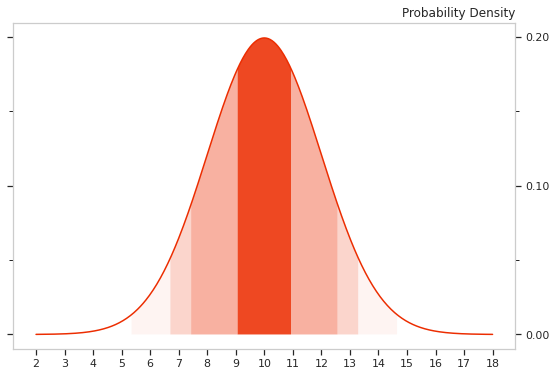

In [ ]:
from fanchart.plot import *
#prob = [0.05, 0.20, 0.35, 0.65,0.80,  0.95]
prob = [0.01, 0.05,0.1,0.32,0.68,0.9,0.95,0.99]

fan_single(loc=10, sigma=2, gamma=0, p=prob, kind='pdf');
#fan_single(loc=1.51, sigma=1.34, gamma=0.0, p=prob, kind='cdf');

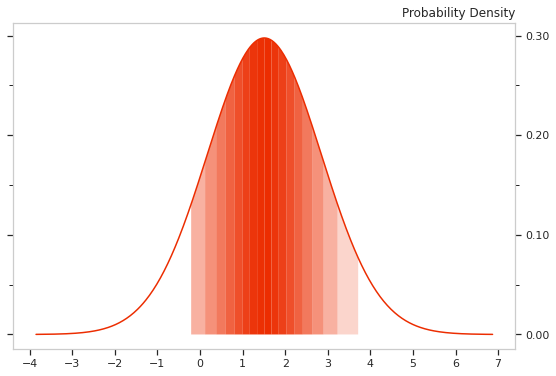

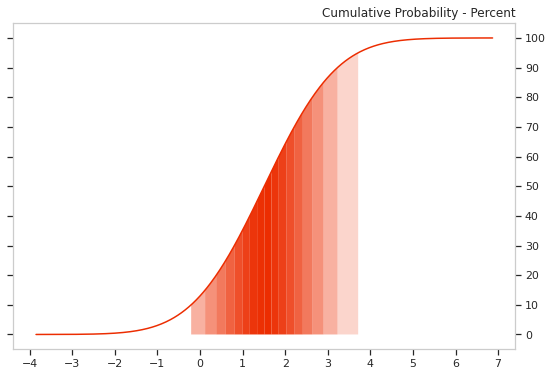

In [ ]:
prob = np.arange(0.10, 1, 0.05)
fan_single(loc=1.51, sigma=1.34, gamma=0.0, p=prob, kind='pdf');
fan_single(loc=1.51, sigma=1.34, gamma=0.0, p=prob, kind='cdf');

# Fan chart para a projeção da inflação

- O gráfico mostra o Fan Chart com a projeção de inflação na Inglaterra para a metade de 2019 em diante.

- A base de dados define os parâmetros ($\mu, \sigma. \gamma$) para cada trimestre considerado.

- O gráfico mostra a inflação histórica observada (linha sólida) e a probabilidade projetada de inflação.

- Na parte onde mostramos a inflação projetada definimos a largura de variação da estimativa.

In [ ]:
!pip install quandl

In [ ]:
#history = load_boe_history()
import pandas as pd
import quandl
quandl.ApiConfig.api_key = 'Pu37EMDt2nmtD7bZ2FjM'
history = quandl.get('BCB/188')
history['Date'] = pd.to_datetime(history.index)
history.rename(columns={'Value': 'Inflation'}, inplace=True)
history.iloc[::3,:].tail()

,Inflation,Date
Date,,
2019-04-30,0.60,2019-04-30
2019-07-31,0.10,2019-07-31
2019-10-31,0.04,2019-10-31
2020-01-31,0.19,2020-01-31
2020-04-30,-0.23,2020-04-30


In [ ]:
parameters = pd.DataFrame({
    'Date':['2020-08-01','2020-11-01','2021-02-01','2021-05-01','2021-08-01','2021-11-01'],
    'Mode':[-0.15,-0.05,0.05,0.16,0.28,0.35],
    'Uncertainty':[0.1,0.15,0.20,0.25,0.3,0.35],
    'Skewness':[0,0,0,0,0,0]
}) 
parameters.info()

In [ ]:
params = pd.read_csv('https://raw.githubusercontent.com/Grupo-de-Pesquisa-em-Macro-Aplicada/Ibmec-Pesquisa-Macro-Aplicada/master/proj_infl_bcb.csv')
params

,ano,50.00%,30.00%,10.00%,Central,10.00%.1,30.00%.1,50.00%.1
0,2020 II,2.0,2.0,2.1,2.1,2.1,2.2,2.2
1,2020 III,2.3,2.5,2.6,2.7,2.8,2.9,3.1
2,2020 IV,1.3,1.6,1.8,1.9,2.0,2.2,2.5
3,2021 I,1.6,2.0,2.3,2.4,2.5,2.8,3.2
4,2021 II,2.7,3.1,3.4,3.6,3.8,4.1,4.5
5,2021 III,2.3,2.7,3.0,3.2,3.4,3.7,4.1
6,2021 IV,2.1,2.5,2.8,3.0,3.2,3.5,3.9
7,2022 I,2.3,2.7,3.0,3.2,3.4,3.7,4.1
8,2022 II,2.5,2.9,3.2,3.4,3.6,3.9,4.3
9,2022 III,2.6,3.0,3.3,3.5,3.7,4.0,4.4


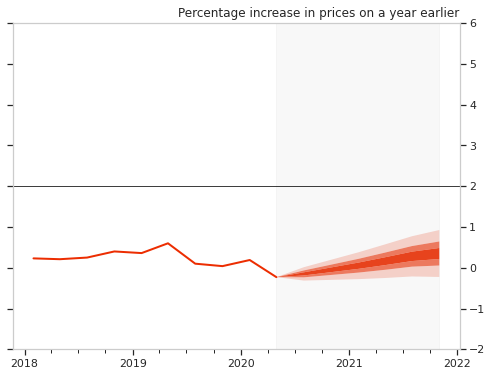

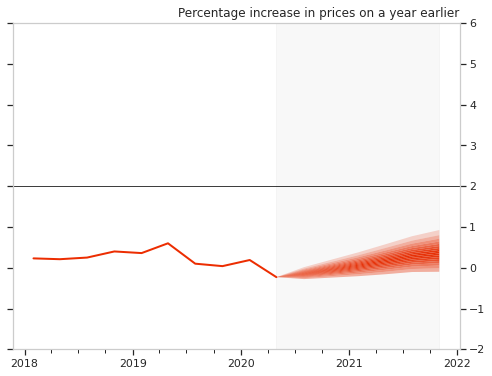

In [ ]:
#parameters = load_boe_parameters()
probs = [0.05, 0.20, 0.35, 0.65,0.80,  0.95]
fan(data=parameters, p=probs, historic=history[history.Date >='2018'].iloc[::3,]);
probs = np.arange(0.10, 1, 0.05)
fan(data=parameters, p=probs, historic=history[history.Date >= '2018'].iloc[::3,]);


Conforme $\cite{calicoww2:2}$ [1] $\textit{foi}$ dito....


$\alpha$  

$\section{aa}$

![texto alternativo](https://)


In [ ]:
!pip install bibtexparser

!curl https://raw.githubusercontent.com/Grupo-de-Pesquisa-em-Macro-Aplicada/Ibmec-Pesquisa-Macro-Aplicada/master/cit.bib  > cit.bib


In [ ]:
import bibtexparser

with open('cit.bib') as bibtex_file:
    bibtex_str = bibtex_file.read()

bib_database = bibtexparser.loads(bibtex_str)

i=1
for entry in bib_database.entries:  
  if 'url' in entry.keys(): 
    print('['+str(i)+'] '+entry['title']+'". [Online] Available: '+entry['url'] + ', '+entry['urldate']+'.')
  else:
    print('['+str(i)+'] '+entry['author']+', "'+entry['title']+'". '+str(entry['year'])+', '+entry['pages'])
  i=i+1
        

In [ ]:
!cat macro.bib

In [ ]:
!cat /content/macro.bib